In [1]:
#Part 1: Data Preparation and Preprocessing
import pandas as pd 
job_data = pd.read_csv("data.csv", low_memory = False)
len(job_data)
job_data.shape

import warnings
warnings.filterwarnings('ignore')


In [2]:
job_data.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
#We'll describe the datset using the int64 columns, which in our case is lowest and highest salary
job_data.describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [4]:
job_data = job_data.drop(columns =['Requirement', 'FullDescription'])

job_data2 = job_data[job_data.LowestSalary > 0 ] #to find more accurate values I've decided to drop the 0 value entries in the lowest salary columns 

In [5]:
job_data2.describe()

,LowestSalary,HighestSalary
count,255838.000000,255838.000000
mean,81.927235,135.104633
std,43.882711,192.586161
min,30.000000,40.000000
25%,50.000000,60.000000
50%,70.000000,80.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [6]:
# We'll now normalize our data using the maximum absolute scaling 
job_data2_max_scaled = job_data2.copy()

# apply normalization techniques on Highest Salary Column 
column = 'HighestSalary'
job_data2_max_scaled[column] = job_data2_max_scaled[column] / job_data2_max_scaled[column].abs().max()

job_data2_max_scaled = job_data2.copy()

# apply normalization techniques on Lowest Salary Column 
column = 'LowestSalary'
job_data2_max_scaled[column] = job_data2_max_scaled[column] / job_data2_max_scaled[column].abs().max()

# view normalized data
job_data2_max_scaled[['HighestSalary', 'LowestSalary']]


,HighestSalary,LowestSalary
3894,40,0.15
3895,40,0.15
3896,40,0.15
3897,40,0.15
3898,40,0.15
...,...,...
318472,999,1.00
318473,999,1.00
318474,999,1.00
318475,999,1.00


In [7]:
#Cleaning the dataset 
job_data2.isna().sum() # we are checking how many null values in each columns 


Id                        0
Title                     0
Company                8976
Date                      0
Location              97150
Area                 157579
Classification        97150
SubClassification     97150
LowestSalary              0
HighestSalary             0
JobType                9539
dtype: int64

In [8]:
#we can see how many values are missing in each columns
#but to get a better understanding, we'll see what percentage of the values are missing 
job_data2.isnull().sum()/len(job_data2) * 100

Id                    0.000000
Title                 0.000000
Company               3.508470
Date                  0.000000
Location             37.973249
Area                 61.593274
Classification       37.973249
SubClassification    37.973249
LowestSalary          0.000000
HighestSalary         0.000000
JobType               3.728531
dtype: float64

In [9]:
job_data2["Location"].fillna("Australia", inplace = True)
job_data2['Location']

3894       Brisbane
3895         Sydney
3896       Brisbane
3897         Sydney
3898         Sydney
            ...    
318472    Australia
318473    Australia
318474    Australia
318475    Australia
318476    Australia
Name: Location, Length: 255838, dtype: object

In [10]:
job_data2["Area"].fillna("not specified", inplace = True)
job_data2['Area']

3894                    CBD & Inner Suburbs
3895      CBD, Inner West & Eastern Suburbs
3896                          not specified
3897           Parramatta & Western Suburbs
3898            North West & Hills District
                        ...                
318472                        not specified
318473                        not specified
318474                        not specified
318475                        not specified
318476                        not specified
Name: Area, Length: 255838, dtype: object

In [11]:
job_data2["Classification"].fillna("Null", inplace = True)
job_data2['Classification']
job_data2["SubClassification"].fillna("Null", inplace = True)
job_data2['SubClassification']


3894          Sales - Outbound
3895               Chefs/Cooks
3896           Building Trades
3897         Retail Assistants
3898      Bar & Beverage Staff
                  ...         
318472                    Null
318473                    Null
318474                    Null
318475                    Null
318476                    Null
Name: SubClassification, Length: 255838, dtype: object

In [12]:
job_data2['Date']

3894      2018-10-05T00:00:00.000Z
3895      2018-10-05T00:00:00.000Z
3896      2018-10-05T00:00:00.000Z
3897      2018-10-05T00:00:00.000Z
3898      2018-10-05T00:00:00.000Z
                    ...           
318472    2019-03-13T00:00:00.000Z
318473    2019-03-13T00:00:00.000Z
318474    2019-03-12T00:00:00.000Z
318475    2019-03-08T00:00:00.000Z
318476    2019-03-13T00:00:00.000Z
Name: Date, Length: 255838, dtype: object

In [13]:

job_data2['Date'] = pd.to_datetime(job_data2['Date'])

In [14]:
job_data2.dtypes #We've successfully done the conversion 

Id                                object
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
dtype: object

In [15]:
#Data Analysis and interpretation
job_sector = job_data2.groupby('Classification')
job_sub_sector = job_data2.groupby('SubClassification')
job_sector.first()


,Id,Title,Company,Date,Location,Area,SubClassification,LowestSalary,HighestSalary,JobType
Classification,,,,,,,,,,
Accounting,37399970,Cadet Accountant / Junior Advisor,ESV,2018-10-05 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Business Services & Corporate Advisory,30,40,Full Time
Administration & Office Support,37399701,Trainee Administrator - Training and Competenc...,Downer EDI Limited - MEI,2018-10-05 00:00:00+00:00,Brisbane,not specified,Administrative Assistants,30,40,Full Time
"Advertising, Arts & Media",37392964,Performing Arts Centre Trainee,Wellington Shire Council,2018-10-04 00:00:00+00:00,Bairnsdale & Gippsland,not specified,Performing Arts,30,40,Contract/Temp
Banking & Financial Services,37399705,Graduate Paraplanner / Trainee Financial Planner,CCA Financial Planners,2018-10-05 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,Financial Planning,30,40,Full Time
CEO & General Management,37380759,Manager Change Delivery,Qantas Airways Ltd,2018-10-03 00:00:00+00:00,Sydney,not specified,Other,30,40,Full Time
Call Centre & Customer Service,37400094,Tele Sales Role.,Plumboss Australia,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Sales - Outbound,30,40,Full Time
Community Services & Development,37399167,Direct Care Worker - North Western Suburbs,mecwacare,2018-10-05 00:00:00+00:00,Melbourne,Western Suburbs,Aged & Disability Support,30,40,Casual/Vacation
Construction,37397488,Civil Construction Apprenticeships – Dubbo Reg...,Skillset Limited,2018-10-05 00:00:00+00:00,Blue Mountains & Central West,not specified,Other,30,40,Full Time
Consulting & Strategy,37391233,Trainee Asbestos Assessor,Cargill Environmental,2018-10-04 00:00:00+00:00,Brisbane,not specified,Other,50,60,Full Time


In [16]:
job_sub_sector.first()

,Id,Title,Company,Date,Location,Area,Classification,LowestSalary,HighestSalary,JobType
SubClassification,,,,,,,,,,
Account & Relationship Management,37395791,Client Success Manager - Sydney,Proficio ANZ Pty Ltd,2018-10-05 00:00:00+00:00,Sydney,not specified,Sales,30,40,Full Time
Accounts Officers/Clerks,37386469,Accounts Clerk,Farrar Gesini Dunn,2018-10-04 00:00:00+00:00,ACT,not specified,Accounting,30,40,Full Time
Accounts Payable,37394630,Accounts Payable Clerk,M&B Sales Pty Ltd,2018-10-04 00:00:00+00:00,Perth,not specified,Accounting,30,40,Part Time
Accounts Receivable/Credit Control,37393939,Accounts Receivable/Admin Support Officer,Mike Carney Toyota,2018-10-04 00:00:00+00:00,Northern QLD,not specified,Accounting,30,40,Full Time
Actuarial,37389601,"Senior Actuarial Analyst, Group Life Pricing",Bluefin Resources Pty Limited,2018-10-04 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Insurance & Superannuation,120,150,Full Time
...,...,...,...,...,...,...,...,...,...,...
Web Development & Production,37392410,Digital Project Manager,Bluefin Resources Pty Limited,2018-10-04 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,30,40,Full Time
Welders & Boilermakers,37376703,Apprentice Welder/Vehicle Body Builder,ATEL Employment Services,2018-10-03 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,Trades & Services,30,40,Full Time
Winery & Viticulture,37379204,Casual Vineyard Hand,Byrne Vineyards Pty Ltd,2018-10-03 00:00:00+00:00,Riverland & Murray Mallee,not specified,"Farming, Animals & Conservation",40,50,Casual/Vacation


In [17]:
x = job_data2.groupby(['Classification', 'SubClassification'])
x.first() 

Id  \
Classification    SubClassification                              
Accounting        Accounts Officers/Clerks            37386469   
                  Accounts Payable                    37394630   
                  Accounts Receivable/Credit Control  37393939   
                  Analysis & Reporting                37366798   
                  Assistant Accountants               37389483   
...                                                        ...   
Trades & Services Printing & Publishing Services      37391627   
                  Security Services                   37374964   
                  Tailors & Dressmakers               37415335   
                  Technicians                         37398359   
                  Welders & Boilermakers              37376703   

                                                                                           Title  \
Classification    SubClassification                                                                
Accounting        Accounts Officers/Clerks                                        Accounts Clerk   
                  Accounts Payable                                        Accounts Payable Clerk   
                  Accounts Receivable/Credit Control   Accounts Receivable/Admin Support Officer   
                  Analysis & Reporting                Senior Commercial Analyst - Bids & Tenders   
                  Assistant Accountants                          Assistant Accountant (Contract)   
...                                                                                          ...   
Trades & Services Printing & Publishing Services                                  Offset Printer   
                  Security Services                                             Infantry Soldier   
                  Tailors & Dressmakers                         Experienced Embroidery Machinist   
                  Technicians                                   Automotive Apprentice Technician   
                  Welders & Boilermakers                  Apprentice Welder/Vehicle Body Builder   

                                                                                       Company  \
Classification    SubClassification                                                              
Accounting        Accounts Officers/Clerks                                  Farrar Gesini Dunn   
                  Accounts Payable                                           M&B Sales Pty Ltd   
                  Accounts Receivable/Credit Control                        Mike Carney Toyota   
                  Analysis & Reporting                                        West Recruitment   
                  Assistant Accountants                              Arkadin Australia Pty Ltd   
...                                                                                        ...   
Trades & Services Printing & Publishing Services                           Reactiv NSW Pty Ltd   
                  Security Services                   Defence Force Recruiting Southern Region   
                  Tailors & Dressmakers                       Universal Workwear an Embroidery   
                  Technicians                                             DVG Automotive Group   
                  Welders & Boilermakers                              ATEL Employment Services   

                                                                          Date  \
Classification    SubClassification                                              
Accounting        Accounts Officers/Clerks           2018-10-04 00:00:00+00:00   
                  Accounts Payable                   2018-10-04 00:00:00+00:00   
                  Accounts Receivable/Credit Control 2018-10-04 00:00:00+00:00   
                  Analysis & Reporting               2018-10-02 00:00:00+00:00   
                  Assistant Accountants              2018-10-04 00:00:00+00:00   
...                                                

In [18]:
#getting location info 
L = job_data2.groupby(['Location', 'Area'])
L.first()

,,Id,Title,Company,Date,Classification,SubClassification,LowestSalary,HighestSalary,JobType
Location,Area,,,,,,,,,
ACT,not specified,37398133,Casual Sales Assistants - Belconnen,TEMT,2018-10-05 00:00:00+00:00,Retail & Consumer Products,Retail Assistants,30,40,Casual/Vacation
Adelaide,not specified,37398039,Retail Telesales Representative,Barossa Fine Foods,2018-10-05 00:00:00+00:00,Call Centre & Customer Service,Sales - Inbound,30,40,Casual/Vacation
Adelaide Hills & Barossa,not specified,37390405,Casual Cook in Mylor,Jora Local,2018-10-04 00:00:00+00:00,Hospitality & Tourism,Chefs/Cooks,30,40,Casual/Vacation
Albany & Great Southern,not specified,37386527,Journalist/Copywriter,Great Southern Weekender,2018-10-04 00:00:00+00:00,"Advertising, Arts & Media",Journalism & Writing,30,40,Part Time
Albury Area,not specified,37398734,Casual Barista in Albury,Jora Local,2018-10-05 00:00:00+00:00,Hospitality & Tourism,Bar & Beverage Staff,30,40,Casual/Vacation
...,...,...,...,...,...,...,...,...,...,...
Western QLD,not specified,37400017,Seasonal Retail Consultants | Myer Maroochydore,Aesop,2018-10-05 00:00:00+00:00,Sales,Sales Representatives/Consultants,30,40,Contract/Temp
Whyalla & Eyre Peninsula,not specified,37384414,Pool Supervisor,Port Augusta City Council,2018-10-03 00:00:00+00:00,Sport & Recreation,Coaching & Instruction,30,40,Casual/Vacation
"Wollongong, Illawarra & South Coast",not specified,37397539,Automotive Light Vehicle Apprentice,Palmira Holdings Enterprises Pty Ltd,2018-10-05 00:00:00+00:00,Trades & Services,Automotive Trades,30,40,Full Time


In [19]:
#majority of Areas aren't specified so we'll actually get a better picture by just grouping with Location 
pd.set_option('display.max_rows', 66)
L.location = job_data2.groupby('Location')
L.location.first()


,Id,Title,Company,Date,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
Location,,,,,,,,,,
ACT,37398133,Casual Sales Assistants - Belconnen,TEMT,2018-10-05 00:00:00+00:00,not specified,Retail & Consumer Products,Retail Assistants,30,40,Casual/Vacation
Adelaide,37398039,Retail Telesales Representative,Barossa Fine Foods,2018-10-05 00:00:00+00:00,not specified,Call Centre & Customer Service,Sales - Inbound,30,40,Casual/Vacation
Adelaide Hills & Barossa,37390405,Casual Cook in Mylor,Jora Local,2018-10-04 00:00:00+00:00,not specified,Hospitality & Tourism,Chefs/Cooks,30,40,Casual/Vacation
Albany & Great Southern,37386527,Journalist/Copywriter,Great Southern Weekender,2018-10-04 00:00:00+00:00,not specified,"Advertising, Arts & Media",Journalism & Writing,30,40,Part Time
Albury Area,37398734,Casual Barista in Albury,Jora Local,2018-10-05 00:00:00+00:00,not specified,Hospitality & Tourism,Bar & Beverage Staff,30,40,Casual/Vacation
Alice Springs & Central Australia,37375849,IT Support Technician,BIZCOM (NT) Pty Ltd,2018-10-03 00:00:00+00:00,not specified,Information & Communication Technology,Help Desk & IT Support,30,40,Full Time
Australia,37987753,"Casual Club Attendant- Bingo, Bar, Gaming",Diggers Services Club,2018-12-27 00:00:00+00:00,not specified,Null,Null,30,40,Casual/Vacation
Bairnsdale & Gippsland,37392964,Performing Arts Centre Trainee,Wellington Shire Council,2018-10-04 00:00:00+00:00,not specified,"Advertising, Arts & Media",Performing Arts,30,40,Contract/Temp
Ballarat & Central Highlands,37398153,Customer Administration Rostering Officer,Royal Freemasons Ltd,2018-10-05 00:00:00+00:00,not specified,Administration & Office Support,Administrative Assistants,30,40,Part Time


In [20]:
#Study the market by locations 
L.location.count()

,Id,Title,Company,Date,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
Location,,,,,,,,,,
ACT,5179,5179,5099,5179,5179,5179,5179,5179,5179,4918
Adelaide,5397,5397,5145,5397,5397,5397,5397,5397,5397,5235
Adelaide Hills & Barossa,148,148,143,148,148,148,148,148,148,145
Albany & Great Southern,116,116,115,116,116,116,116,116,116,114
Albury Area,338,338,330,338,338,338,338,338,338,334
Alice Springs & Central Australia,247,247,236,247,247,247,247,247,247,239
Australia,97150,97150,93826,97150,97150,97150,97150,97150,97150,93510
Bairnsdale & Gippsland,310,310,304,310,310,310,310,310,310,302
Ballarat & Central Highlands,484,484,470,484,484,484,484,484,484,468


In [27]:
sorted_by_location = job_data2.sort_values('Location')
sorted_by_location['count'] = 1
sorted_by_location.head()
sorted_by_location.groupby(['Location', 'Area']).sum()


,,LowestSalary,HighestSalary,count
Location,Area,,,
ACT,not specified,538590,1209859,5179
Adelaide,not specified,385820,607804,5397
Adelaide Hills & Barossa,not specified,7950,11957,148
Albany & Great Southern,not specified,8490,14165,116
Albury Area,not specified,21300,29086,338
Alice Springs & Central Australia,not specified,19320,32588,247
Australia,not specified,7929560,12032279,97150
Bairnsdale & Gippsland,not specified,21070,37774,310
Ballarat & Central Highlands,not specified,32000,47229,484


In [42]:
#What is the market size in each city? Which is the hottest job
#sectors in each city?

pd.set_option('display.max_rows', 1600)
sorted_by_location = job_data2.sort_values('Location')
sorted_by_location['count'] = 1

summed_job = sorted_by_location.groupby(['Location', 'Classification']).sum().reset_index()
job_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['Location'])
job_max.sort_values('Location', inplace = True)

display(job_max)
#the count max will show the largest market for each classification 
#using subclassification makes more sense, but our data for subclassification has many inconsistent and 'Other' values 

,Location,Classification,LowestSalary,HighestSalary,count
17,ACT,Information & Communication Technology,262060,757636,1770
59,Adelaide,Trades & Services,33230,40130,643
69,Adelaide Hills & Barossa,Hospitality & Tourism,1280,1580,30
88,Albany & Great Southern,Healthcare & Medical,2050,5526,20
112,Albury Area,Healthcare & Medical,5370,9486,71
136,Alice Springs & Central Australia,Healthcare & Medical,4870,9775,46
146,Australia,Null,7929560,12032279,97150
159,Bairnsdale & Gippsland,Healthcare & Medical,5480,13481,61
182,Ballarat & Central Highlands,Healthcare & Medical,7380,15811,84
209,"Bendigo, Goldfields & Macedon Ranges",Healthcare & Medical,8040,10359,119


In [49]:
#2.bWhich range of salary is common in each city? Where are the
#employees more well-paid?

pd.set_option('display.max_rows', 1600)
sorted_by_location = job_data2.sort_values('Location')
sorted_by_location['count'] = 1

summed_job = sorted_by_location.groupby(['Location', 'LowestSalary', 'HighestSalary']).sum().reset_index()
salary_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['Location'])
salary_max.sort_values('Location', inplace = True)

display(salary_max)

,Location,LowestSalary,HighestSalary,count
8,ACT,150,200,976
11,Adelaide,40,50,1007
21,Adelaide Hills & Barossa,40,50,37
30,Albany & Great Southern,40,50,21
40,Albury Area,40,50,64
53,Alice Springs & Central Australia,70,80,44
60,Australia,40,50,12700
70,Bairnsdale & Gippsland,40,50,50
80,Ballarat & Central Highlands,40,50,84
89,"Bendigo, Goldfields & Macedon Ranges",30,40,136


In [51]:
#detecting the pattern of posting: e.g., are more jobs posted at
#the beginning of the month?

pd.set_option('display.max_rows', 1600)
sorted_by_date = job_data2.sort_values('Date')
sorted_by_date['count'] = 1

summed_job = sorted_by_location.groupby(['Date']).sum().reset_index()
date_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['Date'])
date_max.sort_values('Date', inplace = True)

display(date_max)

,Date,LowestSalary,HighestSalary,count
0,2018-10-01 00:00:00+00:00,117560,240965,1023
1,2018-10-02 00:00:00+00:00,227930,414017,1980
2,2018-10-03 00:00:00+00:00,421810,647512,4945
3,2018-10-04 00:00:00+00:00,636510,930900,8506
4,2018-10-05 00:00:00+00:00,225770,304252,3307
5,2018-10-07 00:00:00+00:00,1370,1710,18
6,2018-10-08 00:00:00+00:00,424970,645052,4995
7,2018-10-09 00:00:00+00:00,488870,708842,6329
8,2018-10-10 00:00:00+00:00,366370,542319,4652
9,2018-10-11 00:00:00+00:00,141890,293178,1221


In [105]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='ggplot',offline=True) 

date_max.iplot(kind='bar', color='purple',
                         xTitle='Date', yTitle='count',
                         title='Job posting dates')

In [67]:
#Which sectors keep the highest market share?
pd.set_option('display.max_rows', 1600)
sorted_by_sectors = job_data2.sort_values('Classification')
sorted_by_sectors['count'] = 1

summed_job = sorted_by_sectors.groupby(['Classification']).sum().reset_index()
sector_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['Classification'])
sector_max.sort_values('Classification', inplace = True)

display(sector_max)

,Classification,LowestSalary,HighestSalary,count
0,Accounting,628940,955694,7456
1,Administration & Office Support,401380,502060,7668
2,"Advertising, Arts & Media",46700,65319,660
3,Banking & Financial Services,363730,638892,3763
4,CEO & General Management,106970,320514,721
5,Call Centre & Customer Service,158010,201078,3076
6,Community Services & Development,215180,279074,3512
7,Construction,752970,1322327,6907
8,Consulting & Strategy,122950,251341,1014
9,Design & Architecture,121980,190365,1453


In [110]:


sector_max.iplot(kind='bar', color='red',
                         xTitle='count', yTitle='Classification',
                         title='Jobs in each sector')

<AxesSubplot:xlabel='Classification'>

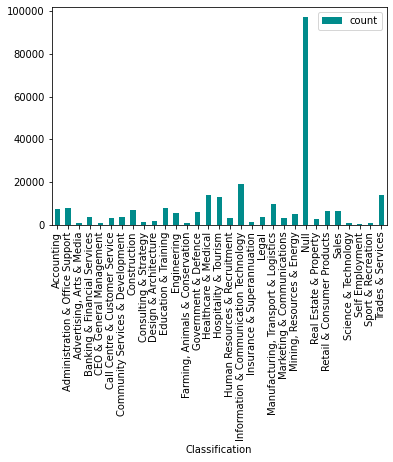

In [111]:
sector_max.plot.bar('Classification', 'count', color=['darkcyan'])


In [75]:
#In each sector, which sub-sectors are the main spotlights?
pd.set_option('display.max_rows', 1600)
sorted_by_subsectors = job_data2.sort_values('SubClassification')
sorted_by_subsectors['count'] = 1

summed_job = sorted_by_sectors.groupby(['Classification', 'SubClassification']).sum().reset_index()
subsector_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['Classification'])
subsector_max.sort_values('SubClassification', inplace = True)

display(subsector_max)

,Classification,SubClassification,LowestSalary,HighestSalary,count
25,Administration & Office Support,Administrative Assistants,168420,209963,3454
76,Community Services & Development,Aged & Disability Support,82290,103495,1565
34,"Advertising, Arts & Media",Agency Account Management,8960,11569,113
105,Design & Architecture,Architecture,29470,42611,337
374,Trades & Services,Automotive Trades,142420,176535,2606
208,Hospitality & Tourism,Chefs/Cooks,156790,198506,3763
115,Education & Training,Childcare & Outside School Hours Care,89590,111537,1912
135,Engineering,Civil/Structural Engineering,156780,247761,1428
255,Insurance & Superannuation,Claims,30270,38228,411
52,Banking & Financial Services,Compliance & Risk,72950,129051,600


In [85]:
#What is the salary range for each sector/sub-sector? Can you
#compare the salary range between sectors/subsectors?
pd.set_option('display.max_rows', 1600)
sorted_by_location = job_data2.sort_values('Classification')
sorted_by_location['count'] = 1

summed_job = sorted_by_location.groupby(['Classification', 'LowestSalary', 'HighestSalary']).sum().reset_index()
sector_salary_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['Classification'])
sector_salary_max.sort_values('Classification', inplace = True)

display(sector_salary_max)

,Classification,LowestSalary,HighestSalary,count
3,Accounting,60,70,1281
11,Administration & Office Support,40,50,2092
24,"Advertising, Arts & Media",70,80,123
38,Banking & Financial Services,150,200,571
49,CEO & General Management,200,999,246
51,Call Centre & Customer Service,40,50,1091
62,Community Services & Development,50,60,802
78,Construction,150,200,1439
88,Consulting & Strategy,150,200,226
94,Design & Architecture,70,80,296


<AxesSubplot:ylabel='Classification'>

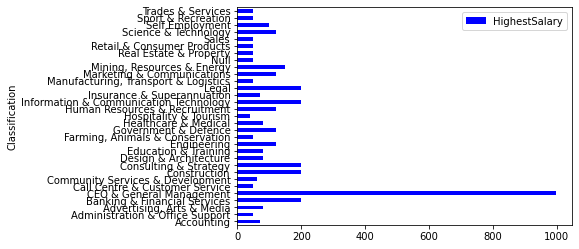

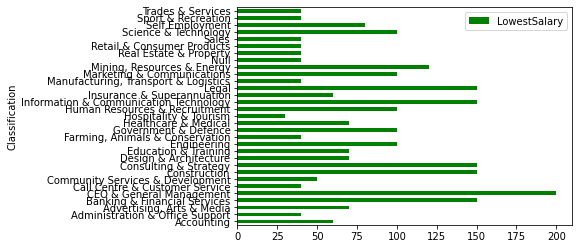

In [92]:
sector_salary_max.plot.barh('Classification', 'HighestSalary', color=['blue'])
sector_salary_max.plot.barh('Classification', 'LowestSalary', color=['green'])

In [113]:

sector_salary_max.iplot(kind='bar', color='blue',
                         xTitle='Classification', yTitle='HighestSalary',
                         title='Lower end of salary in each sector')

sector_salary_max.iplot(kind='bar', color='green',
                         xTitle='Classification', yTitle='LowestSalary',
                         title='Higher end of salary in each sector')


In [93]:
pd.set_option('display.max_rows', 1600)
sorted_by_location = job_data2.sort_values('SubClassification')
sorted_by_location['count'] = 1

summed_job = sorted_by_location.groupby(['SubClassification', 'LowestSalary', 'HighestSalary']).sum().reset_index()
sector_salary_max = summed_job.sort_values('count', ascending = False).drop_duplicates(['SubClassification'])
sector_salary_max.sort_values('SubClassification', inplace = True)

display(sector_salary_max)

,SubClassification,LowestSalary,HighestSalary,count
6,Account & Relationship Management,100,120,241
12,Accounts Officers/Clerks,50,60,198
22,Accounts Payable,50,60,157
32,Accounts Receivable/Credit Control,60,70,208
43,Actuarial,100,120,11
47,Administration,40,50,99
56,Administrative Assistants,40,50,1010
71,Aerospace Engineering,100,120,24
77,Aged & Disability Support,50,60,429
88,Agency Account Management,70,80,36
